<a href="https://colab.research.google.com/github/mrtlckn/IntroToPytorch/blob/main/102_DiffusionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
class Diffusion:
  def __init__(self, noise_steps= 1000, beta_start = 1e-4, beta_end = 0.02, img_size = 64):
    self.noise_steps = noise_steps
    self.beta_start = beta_start
    self.beta_end = beta_end
    self.img_size = img_size

    self.beta = self.prepate_noise_schedule
    self.alpha = 1. - self.beta
    self.alpha_hat = torch.cumprod(self.alpha, dim = 0)

  def prepare_noise_schedule(self):
    return torch.linspace(self.beta_start, self.beta_end, self.noise_steps)

------
### From Scratch

https://lilianweng.github.io/posts/2021-07-11-diffusion-models/

https://arxiv.org/abs/2208.11970

https://arxiv.org/abs/2006.11239

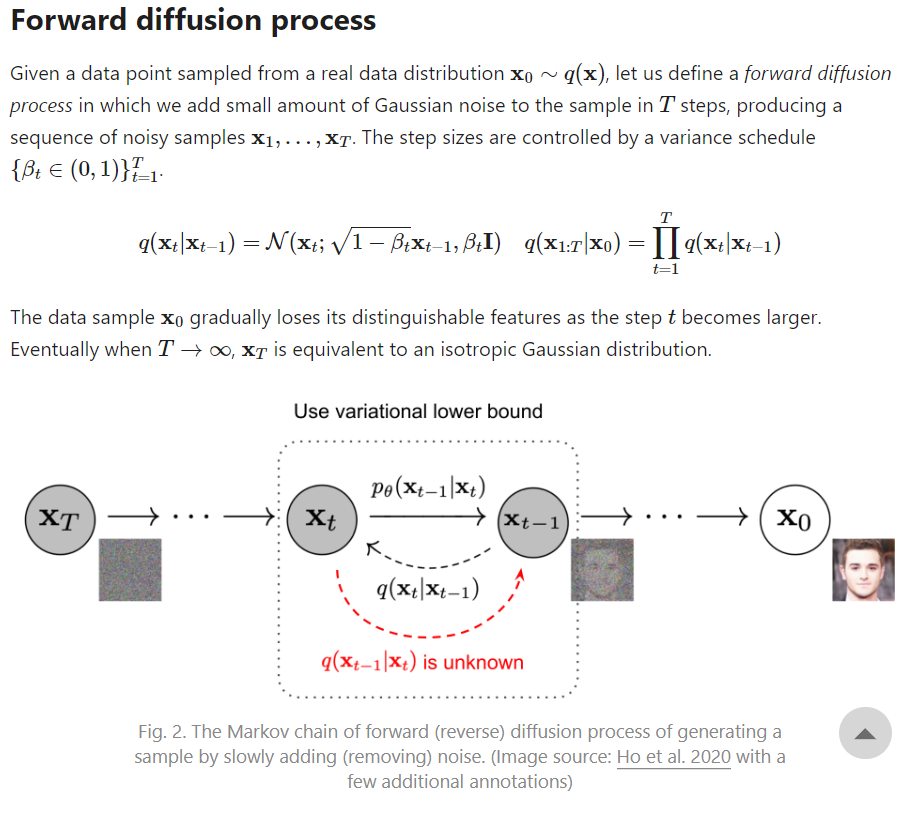

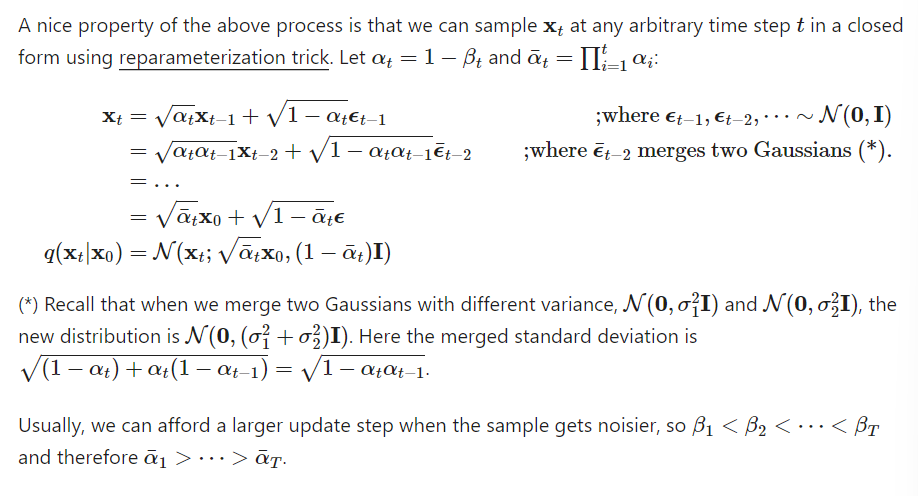

In [ ]:
"""
mean = sqrt(a_hat_t) * x_0
variance = sqrt(1- a_hat_t) * random_noise
"""


In [1]:
import torch

In [2]:
x0 = torch.randn(2,3,32,32) # batchsize 2, 3 channels, 32x32

In [4]:
betas = torch.tensor([0.05, 0.1, 0.15, 0.2, 0.25])

In [5]:
# Timestep
t = torch.tensor([1,3])

In [6]:
# betas -> amount of noise that are being applied at every timestep of the diffusion process
# alfas -> 1 - betas -> amount of original image's information that is  being preserved after a diffusion process step

alphas = 1 - betas

In [7]:
alphas

tensor([0.9500, 0.9000, 0.8500, 0.8000, 0.7500])

In [15]:
# alpha hat -> multiplication of the alphas
alpha_hat = torch.cumprod(alphas, axis = 0)


In [16]:
alpha_hat

tensor([0.9500, 0.8550, 0.7268, 0.5814, 0.4360])

----
----
At some point we're gonna be adding or multiplying the information from alpha_hat to x0. So we need to have a way how to extract information from alpha_hat and also be able to then multiply this information with x0.

In [17]:
alpha_hat.size()

torch.Size([5])

In [18]:
x0.size()

torch.Size([2, 3, 32, 32])

In [25]:
# Task 1
alpha_hat # we want to only fetch those which correspond to the specified time step

tensor([0.9500, 0.8550, 0.7268, 0.5814, 0.4360])

In [26]:
result = alpha_hat.gather(-1, t) # t here is beig acts as a index.

In [27]:
result

tensor([0.8550, 0.5814])

In [28]:
# Task 2
result.size() # same as batch size


torch.Size([2])

In [29]:
result = result.reshape(-1, 1, 1, 1) # reshape it like x0.size(4 dimessions)

In [30]:
# Task 3
# Now we'll be able to basically multiply


noise = torch.rand_like(x0) # noise is a tensor of the same shape as x0.
#Values in this tensor will be basically sampled from the gaussian distributon with the mean zero and standart deviation of one


# mean = sqrt(a_hat_t) * x0
mean = result.sqrt() * x0


# variance = sqrt(1- a_hat_t) * random_noise
variance =  torch.sqrt( 1- result ) * noise

In [32]:
# Final
x_t = mean + variance # X of T will two images.
# One image at the Timestep 1 with less noise
# Another image at the Timestep 3 with more noise
x_t.size()

torch.Size([2, 3, 32, 32])

In [33]:
x_t[0]

tensor([[[ 1.4620, -0.3850,  0.1317,  ...,  0.8287,  1.5938, -0.7983],
         [-0.6171, -1.5871,  1.6737,  ..., -0.4045,  0.4204, -0.3930],
         [-0.8018,  0.9501, -1.3258,  ...,  0.1728, -0.1121, -0.0501],
         ...,
         [-0.4445, -1.2383, -0.7816,  ...,  1.6673,  0.8413,  1.0659],
         [ 0.7382,  0.1812, -0.6384,  ...,  0.6021, -0.4648, -0.7704],
         [ 1.4600,  0.5507,  0.5912,  ..., -1.0227,  0.5604,  1.2959]],

        [[-0.3495,  1.0004,  0.9721,  ...,  0.2753,  0.4645, -0.9475],
         [ 1.9865,  1.7298, -0.4911,  ..., -0.5382, -1.1035,  0.3383],
         [-0.1681,  0.6615,  0.3422,  ...,  0.5530,  1.4039, -1.0325],
         ...,
         [ 0.8286, -0.5811,  0.1297,  ...,  0.8821, -0.8598, -0.3466],
         [-0.1742,  0.5621,  0.2123,  ...,  0.3292, -0.2079,  0.9821],
         [-0.3330,  0.9987, -2.1696,  ..., -1.3290, -0.6792, -0.2383]],

        [[-1.6282, -0.4102,  1.5552,  ...,  0.3594, -0.4894, -0.8377],
         [ 0.6778, -0.6010,  0.8102,  ...,  0

### Function

In [35]:
def forward_diffusion(x0, t, betas = torch.linspace(0.0, 1.0, 5)):
  pass